In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso #Just trying this over Linear Regression to see what happens.
from sklearn import metrics
import sklearn
import missingno as msno

pd.set_option('display.max_columns', None)

In [2]:
test = pd.read_csv('datasets/test.csv')

In [3]:
sample = pd.read_csv('datasets/sample_sub_reg.csv')

In [4]:
train = pd.read_csv('datasets/train.csv')

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
#Wrote a funtion to check missing values

def check_missings():
    return train.apply(pd.isnull).sum().sort_values(ascending=False).loc[ lambda series: series>0 ]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
#Can we make one porch column? We can combine all the porch values to create one big 'Total Porch'

train['TotPorch'] = train['Open Porch SF']+train['Enclosed Porch']+train['3Ssn Porch']+train['Screen Porch']
test['TotPorch'] = test['Open Porch SF']+test['Enclosed Porch']+test['3Ssn Porch']+test['Screen Porch']

In [9]:
#I'm sure that if a home as been remodeled it should be worth more money. 

train['RemodelYears'] = train['Year Remod/Add'] - train['Year Built']
test['RemodelYears'] = test['Year Remod/Add'] - test['Year Built']

In [10]:
#Total Square Footage is just 1st FL SQFT and 2nd FL SQFT

train['TotalSqFt'] = train['1st Flr SF'] + train['2nd Flr SF']
test['TotalSqFt'] = test['1st Flr SF'] + test['2nd Flr SF']

In [11]:
print(train.isnull().sum())
print(test.isnull().sum())

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Sale Type         0
SalePrice         0
TotPorch          0
RemodelYears      0
TotalSqFt         0
Length: 84, dtype: int64
Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Yr Sold           0
Sale Type         0
TotPorch          0
RemodelYears      0
TotalSqFt         0
Length: 83, dtype: int64


In [12]:
#List of columns that can be dropped:

#Pool QC, Fence, Misc Feature, Alley, Utilities, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Electrical,
#External Qual, Basement Qual, Garage Qual, Overall Qual, Lot Shape, MS SubClass, 1st Flr SF, 2nd Flr SF

train.drop(columns = ['Pool QC', 'Fence', 'Misc Feature', 'Alley', 'Utilities', 'Open Porch SF',
                     'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Electrical', 'Exter Qual', 'Bsmt Qual',
                     'Garage Qual', 'Overall Qual', 'MS SubClass', '1st Flr SF', '2nd Flr SF'], inplace = True)

In [13]:
test.drop(columns = ['Pool QC', 'Fence', 'Misc Feature', 'Alley', 'Utilities', 'Open Porch SF',
                     'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Electrical', 'Exter Qual', 'Bsmt Qual',
                     'Garage Qual', 'Overall Qual', 'MS SubClass', '1st Flr SF', '2nd Flr SF'], inplace = True)

In [14]:
train.head()

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Cond,Foundation,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,TotPorch,RemodelYears,TotalSqFt
0,109,533352170,RL,NaN,13517,Pave,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,TA,CBlock,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,Y,0,0,0,3,2010,WD,130500,44,29,1479
1,544,531379050,RL,43.0,11492,Pave,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,TA,PConc,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,0,0,0,4,2009,WD,220000,74,1,2122
2,153,535304180,RL,68.0,7922,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,CBlock,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,Y,0,0,0,1,2010,WD,109000,52,54,1057
3,318,916386060,RL,73.0,9802,Pave,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,100,0,0,4,2010,WD,174000,0,1,1444
4,255,906425045,RL,82.0,14235,Pave,IR1,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,N,0,0,0,3,2010,WD,138500,59,93,1445


In [15]:
#The columns look better, but I want to have the SalePrice as the last column for the sake of neatness

SalePrice = train['SalePrice']
train = train.drop(['SalePrice'],axis=1)

In [16]:
train['SalePrice'] = SalePrice

In [17]:
#Replace spaces with underscores in accordance with good data practice

train.columns = [i.replace(' ', '_').lower() for i in train.columns]
test.columns = [i.replace(' ', '_').lower() for i in test.columns]

In [18]:
#test.columns = [i.replace(' ', '_').lower() for i in test.columns]

In [19]:
#How much time this data consist of?

print('Data from years {} to {}.'.format(train['yr_sold'].min(), train['yr_sold'].max()))
print('Data from years {} to {}.'.format(test['yr_sold'].min(), test['yr_sold'].max()))

Data from years 2006 to 2010.
Data from years 2006 to 2010.


In [20]:
#Replacing null values with something more descriptive:

train['fireplace_qu'] = train['fireplace_qu'].replace({np.nan: 'No fireplace'})
train['garage_finish'] = train['garage_finish'].replace({np.nan: 'No garage'})
train['garage_cond'] = train['garage_cond'].replace({np.nan: 'No garage'})
train['garage_type'] = train['garage_type'].replace({np.nan: 'No garage'})
train['bsmt_cond'] = train['bsmt_cond'].replace({np.nan: 'No basement'})
train['bsmt_exposure'] = train['bsmt_exposure'].replace({np.nan: 'No basement'})
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].replace({np.nan: 'No basement'})
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].replace({np.nan: 'No basement'})
train['mas_vnr_type'] = train['mas_vnr_type'].replace({np.nan: 'No masonry'})

In [21]:
test['fireplace_qu'] = test['fireplace_qu'].replace({np.nan: 'No fireplace'})
test['garage_finish'] = test['garage_finish'].replace({np.nan: 'No garage'})
test['garage_cond'] = test['garage_cond'].replace({np.nan: 'No garage'})
test['garage_type'] = test['garage_type'].replace({np.nan: 'No garage'})
test['bsmt_cond'] = test['bsmt_cond'].replace({np.nan: 'No basement'})
test['bsmt_exposure'] = test['bsmt_exposure'].replace({np.nan: 'No basement'})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].replace({np.nan: 'No basement'})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].replace({np.nan: 'No basement'})
test['mas_vnr_type'] = test['mas_vnr_type'].replace({np.nan: 'No masonry'})

In [22]:
#The minimum number in Lot Frontage is 21ft... If there are missing values, it's more than likely a 0.

train['lot_frontage'] = train['lot_frontage'].fillna(0)
test['lot_frontage'] = test['lot_frontage'].fillna(0)

In [23]:
#There are only two missing values in MS Zoning... and the most popular value is RL... filling with RL

train['ms_zoning'] = train['ms_zoning'].fillna('RL')
test['ms_zoning'] = test['ms_zoning'].fillna('RL')

In [24]:
#Filling empty Garage Areas with the mean garage area values

train['garage_area'] = train['garage_area'].fillna(train['garage_area'].mean())
test['garage_area'] = test['garage_area'].fillna(test['garage_area'].mean())

In [25]:
#Filling in empty Functional rows:

train['functional'] = train['functional'].fillna('Typ')
test['functional'] = test['functional'].fillna('Typ')

In [26]:
#Filling in empty rows in bsmtfin_sf_2 with average values

train['bsmtfin_sf_2'] = train['bsmtfin_sf_2'].fillna(train['bsmtfin_sf_2'].mean())
test['bsmtfin_sf_2'] = test['bsmtfin_sf_2'].fillna(test['bsmtfin_sf_2'].mean())

In [27]:
#Filling in empty rows in bsmtfin_sf_1 with average values

train['bsmtfin_sf_1'] = train['bsmtfin_sf_1'].fillna(train['bsmtfin_sf_1'].mean())
test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].fillna(test['bsmtfin_sf_1'].mean())

In [28]:
#Nearly all values in this column are 'VinylSd', we can safely fill in missing values with 'VinylSd'

train['exterior_2nd'] = train['exterior_2nd'].fillna('VinylSd')
test['exterior_2nd'] = test['exterior_2nd'].fillna('VinylSd')

In [29]:
#The majority of the values in kitchen_qual are 'TA', we are filling the empty spaces with 'TA'

train['kitchen_qual'] = train['kitchen_qual'].fillna('TA')
test['kitchen_qual'] = test['kitchen_qual'].fillna('TA')

In [30]:
#I kept finding more things to clea, and didn't want to create unncessary cells, so
#fixing a lot of things here:

train['exterior_1st'] = train['exterior_1st'].fillna(train['exterior_1st'].value_counts().index[0])
train['bsmt_unf_sf'] = train['bsmt_unf_sf'].fillna(train['bsmt_unf_sf'].mean())
train['total_bsmt_sf'] = train['total_bsmt_sf'].fillna(train['total_bsmt_sf'].mean())
train['sale_type'] = train['sale_type'].fillna(train['sale_type'].value_counts().index[0])

In [31]:
test['exterior_1st'] = test['exterior_1st'].fillna(test['exterior_1st'].value_counts().index[0])
test['bsmt_unf_sf'] = test['bsmt_unf_sf'].fillna(test['bsmt_unf_sf'].mean())
test['total_bsmt_sf'] = test['total_bsmt_sf'].fillna(test['total_bsmt_sf'].mean())
test['sale_type'] = test['sale_type'].fillna(test['sale_type'].value_counts().index[0])

In [32]:
#Discovered some more... filling in Garage Year Built empties with 0

train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
train['garage_cars'] = train['garage_cars'].fillna(2)

In [33]:
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0)
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)
test['garage_cars'] = test['garage_cars'].fillna(2)

In [34]:
test.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_cond,foundation,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_cond,paved_drive,wood_deck_sf,pool_area,misc_val,mo_sold,yr_sold,sale_type,totporch,remodelyears,totalsqft
0,2658,902301120,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,Stone,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,No fireplace,Detchd,1910.0,Unf,1,440,Po,Y,0,0,0,4,2006,WD,172,40,1928
1,2718,905108090,RL,0.0,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,CBlock,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,0,1967,0,0,2,0,6,2,TA,10,Typ,0,No fireplace,Attchd,1977.0,Fin,2,580,TA,Y,170,0,0,8,2006,WD,0,0,1967
2,2414,528218130,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,Y,100,0,0,9,2006,New,24,0,1496
3,1989,902207150,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,CBlock,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,0,968,0,0,1,0,2,1,TA,5,Typ,0,No fireplace,Detchd,1935.0,Unf,2,480,TA,N,0,0,0,7,2007,WD,184,83,968
4,625,535105100,RL,0.0,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,CBlock,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,Y,0,0,0,7,2009,WD,261,0,1394


In [35]:
train.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_cond,foundation,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_cond,paved_drive,wood_deck_sf,pool_area,misc_val,mo_sold,yr_sold,sale_type,totporch,remodelyears,totalsqft,saleprice
0,109,533352170,RL,0.0,13517,Pave,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,TA,CBlock,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No fireplace,Attchd,1976.0,RFn,2.0,475.0,TA,Y,0,0,0,3,2010,WD,44,29,1479,130500
1,544,531379050,RL,43.0,11492,Pave,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,TA,PConc,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,0,0,0,4,2009,WD,74,1,2122,220000
2,153,535304180,RL,68.0,7922,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,CBlock,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No fireplace,Detchd,1953.0,Unf,1.0,246.0,TA,Y,0,0,0,1,2010,WD,52,54,1057,109000
3,318,916386060,RL,73.0,9802,Pave,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,No fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,100,0,0,4,2010,WD,0,1,1444,174000
4,255,906425045,RL,82.0,14235,Pave,IR1,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,No fireplace,Detchd,1957.0,Unf,2.0,484.0,TA,N,0,0,0,3,2010,WD,59,93,1445,138500


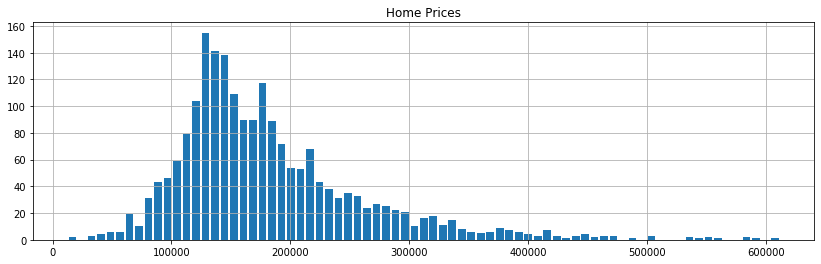

The cheapest house sold for $12,789 and the most expensive for $611,657
The average sales price is $181,470, while median is $162,500


In [36]:
#We're creating a histogram of the sale prices of homes in Ames and looking at the minimum and maximum prices that homes were sold for

train.saleprice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('Home Prices')
plt.show()

print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.saleprice.min(), train.saleprice.max()))

print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.saleprice.mean(), train.saleprice.median()))

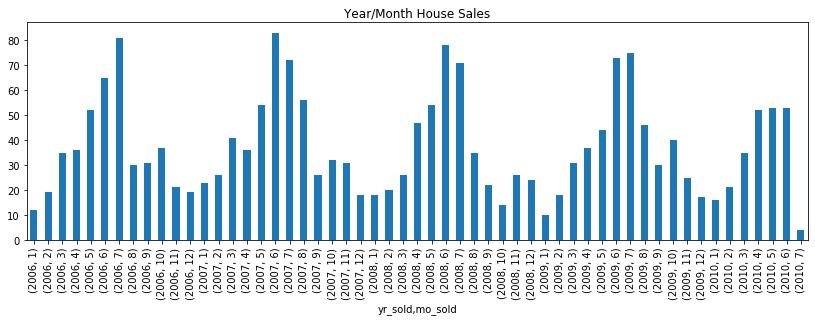

In [37]:
#In this chart, we're looking at the value of homes based on the month they were sold in. Homes tend to sell for
#a lot more money in the summer months.

plt.figure(figsize=(12,10))
train.groupby(['yr_sold','mo_sold']).id.count().plot(kind='bar', figsize=(14,4))
plt.title('Year/Month House Sales')
plt.show()

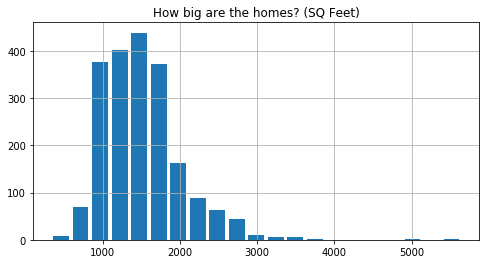

The average house has 1,499 sq ft of space, the median 1,444 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


In [38]:
plt.figure(figsize=(12,10))
train.gr_liv_area.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are the homes? (SQ Feet)')
plt.show()

print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.gr_liv_area.mean(), train.gr_liv_area.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.gr_liv_area.max(), train.gr_liv_area.min()))